# Task 6. Algorithms on graphs. Path search algorithms on weighted graphs

In [1]:
from time import process_time
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx
from collections.abc import Callable
from functools import partial

In [2]:
def random_lower_diagonal(n :int, edges: int) -> list[list[int]]:
    rows = []
    counter = 0
    
    for i in range(n):
        row = [0 for _ in range(n)]
        
        rows.append(row)
    
    while counter < edges:
        for i in range(n):
            for j in range(i):
                if counter >= edges:
                    return rows

                if rows[i][j] == 0:
                    if random.uniform(0, 1) > 0.9:
                        rows[i][j] = random.randint(1, 10)
                        counter += 1
    
    return rows

def random_graph(n: int, edges: int):
    rows = random_lower_diagonal(n, edges)
    
    for i in range(n):
        row = rows[i]
        
        for j in range(n - i - 1):            
            row[n - j - 1] = rows[n - j - 1][i]
    
    return rows

In [3]:
v = 100
e = 500

In [12]:
adj_matrix = random_graph(v, e)

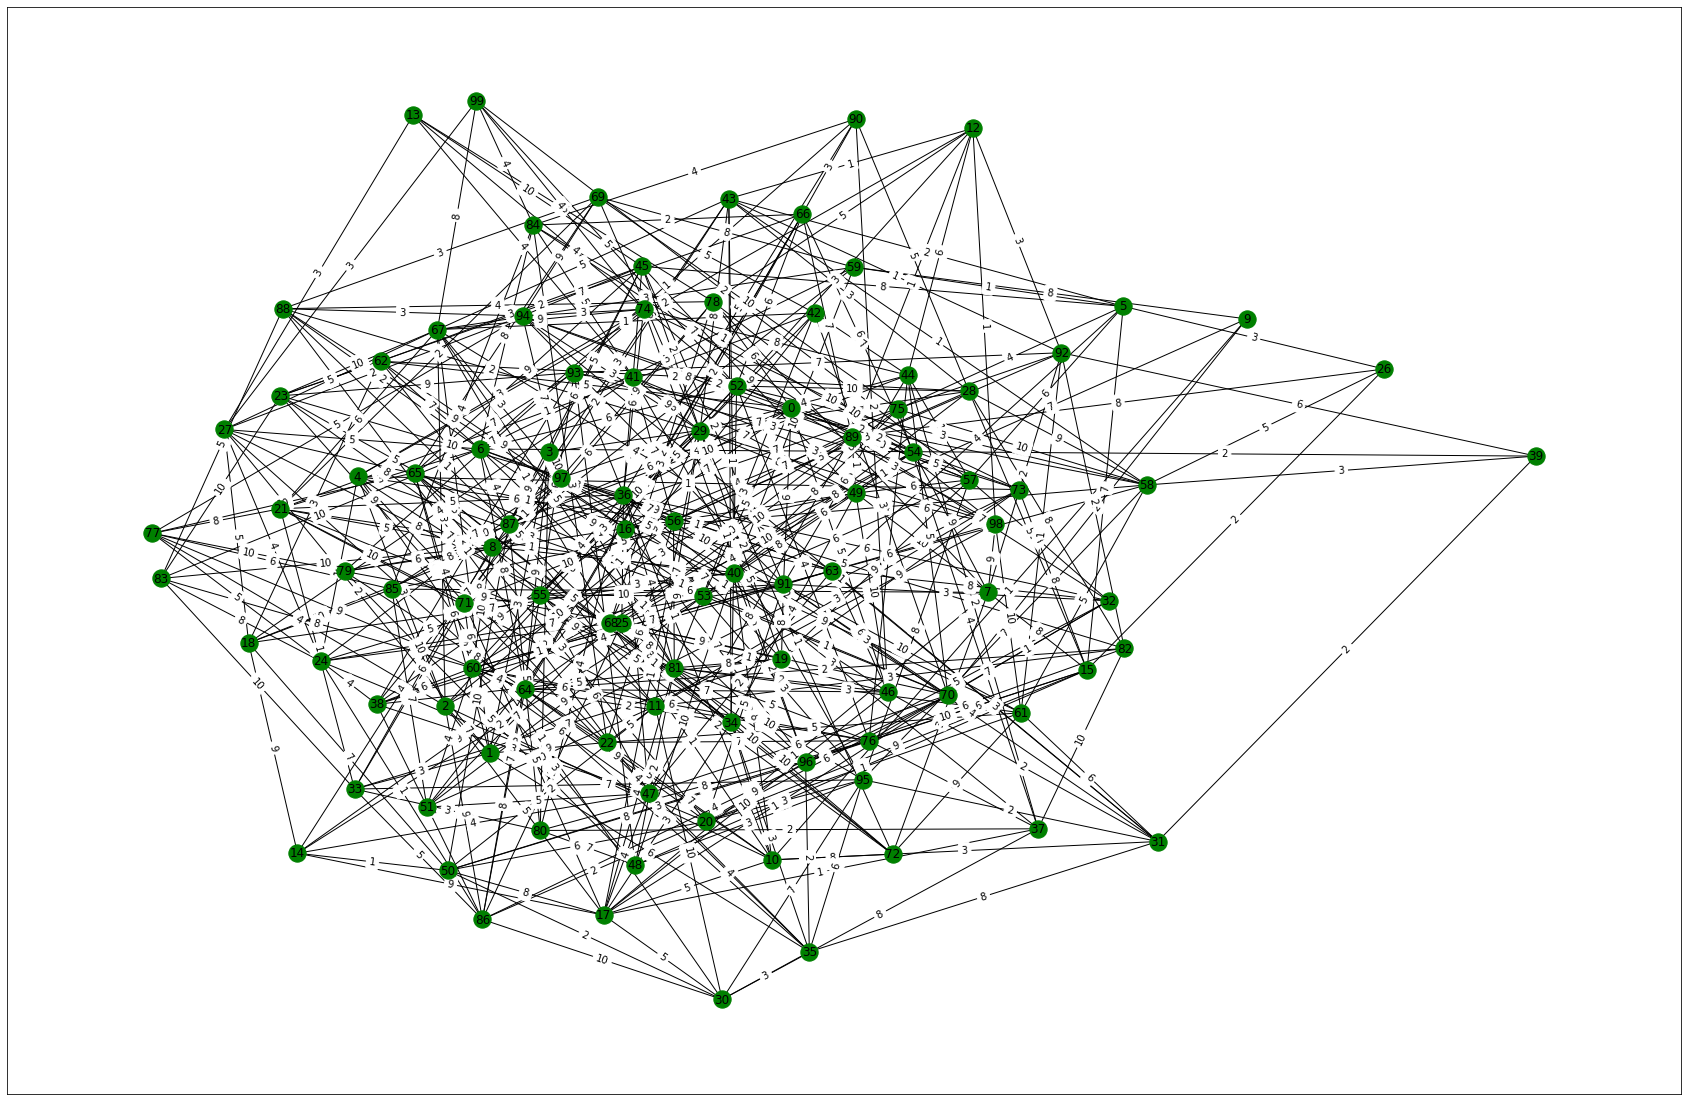

In [13]:
plt.figure(figsize=(30, 20))
graph = nx.from_numpy_matrix(np.array(adj_matrix))

pos = nx.spring_layout(graph, seed=0)
nx.draw_networkx(graph, pos, node_color='green')
labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels);

In [19]:
start_vertex = random.randint(0, v)

start_vertex

56

In [20]:
dijkstra_paths = nx.single_source_dijkstra(graph, start_vertex)

In [21]:
dijkstra_paths[1]

{56: [56],
 2: [56, 4, 2],
 4: [56, 4],
 6: [56, 6],
 22: [56, 22],
 28: [56, 28],
 36: [56, 36],
 41: [56, 41],
 71: [56, 92, 43, 71],
 75: [56, 75],
 81: [56, 81],
 92: [56, 92],
 7: [56, 92, 7],
 8: [56, 92, 43, 40, 8],
 12: [56, 92, 43, 12],
 39: [56, 92, 43, 58, 39],
 43: [56, 92, 43],
 61: [56, 92, 61],
 82: [56, 92, 82],
 93: [56, 92, 43, 58, 93],
 13: [56, 41, 13],
 18: [56, 41, 18],
 29: [56, 92, 7, 17, 29],
 49: [56, 92, 43, 12, 89, 49],
 84: [56, 41, 84],
 95: [56, 92, 61, 20, 95],
 98: [56, 92, 43, 12, 98],
 5: [56, 92, 43, 5],
 34: [56, 92, 43, 34],
 40: [56, 92, 43, 40],
 58: [56, 92, 43, 58],
 67: [56, 92, 43, 67],
 87: [56, 92, 43, 87],
 16: [56, 92, 43, 58, 16],
 20: [56, 92, 61, 20],
 31: [56, 92, 61, 31],
 72: [56, 92, 7, 72],
 91: [56, 92, 61, 20, 91],
 3: [56, 81, 3],
 15: [56, 28, 15],
 52: [56, 92, 43, 58, 52],
 53: [56, 92, 7, 17, 70, 53],
 62: [56, 28, 62],
 90: [56, 6, 90],
 17: [56, 92, 7, 17],
 54: [56, 92, 43, 12, 89, 49, 54],
 78: [56, 92, 7, 78],
 85: [56

In [22]:
bellman_ford_paths = nx.single_source_bellman_ford(graph, 0)

In [23]:
bellman_ford_paths[1]

{0: [0],
 16: [0, 16],
 36: [0, 36],
 46: [0, 46],
 53: [0, 53],
 57: [0, 57],
 62: [0, 62],
 78: [0, 78],
 87: [0, 87],
 91: [0, 91],
 98: [0, 98],
 38: [0, 53, 38],
 47: [0, 16, 47],
 58: [0, 98, 12, 43, 58],
 61: [0, 98, 12, 43, 92, 61],
 66: [0, 16, 66],
 88: [0, 46, 68, 88],
 89: [0, 98, 12, 89],
 96: [0, 46, 90, 6, 96],
 18: [0, 62, 18],
 19: [0, 98, 12, 29, 19],
 21: [0, 91, 21],
 23: [0, 62, 23],
 25: [0, 36, 25],
 29: [0, 98, 12, 29],
 32: [0, 36, 70, 32],
 37: [0, 36, 37],
 45: [0, 62, 45],
 55: [0, 36, 55],
 56: [0, 98, 12, 43, 92, 56],
 70: [0, 36, 70],
 74: [0, 98, 12, 4, 74],
 79: [0, 98, 12, 89, 49, 79],
 80: [0, 36, 80],
 81: [0, 46, 81],
 90: [0, 46, 90],
 17: [0, 36, 70, 17],
 31: [0, 46, 31],
 49: [0, 98, 12, 89, 49],
 63: [0, 46, 97, 63],
 64: [0, 98, 12, 43, 34, 64],
 68: [0, 46, 68],
 97: [0, 46, 97],
 4: [0, 98, 12, 4],
 6: [0, 46, 90, 6],
 14: [0, 53, 14],
 28: [0, 62, 28],
 51: [0, 91, 21, 42, 51],
 95: [0, 53, 95],
 5: [0, 98, 12, 43, 5],
 44: [0, 36, 37, 44],

In [24]:
# Returns an array where each element represents the execution time of the given function
def measure(n: int, fn: Callable) -> float:
    # For each iteration k:
    #                       1) Generate vector of length k
    #                       2) Measure current CPU time
    #                       3) Evaluate function
    #                       4) Measure current CPU time
    tmp = [[process_time(), fn(), process_time()] for _ in range(0, n)]
    
    # CPU time diff
    return sum([each[2] - each[0] for each in tmp]) / n

In [54]:
measure(10, partial(nx.single_source_dijkstra, graph, 0))

0.0008253625000001818

In [55]:
measure(10, partial(nx.single_source_bellman_ford, graph, 0))

0.0018311999999998108

In [61]:
grid_x = 10
grid_y = 20

obstacles = 40

In [139]:
maze = nx.grid_2d_graph(grid_x, grid_y)

In [140]:
removed = 0
while removed < obstacles:
    x = random.randint(0, grid_x - 1)
    y = random.randint(0, grid_y - 1)
    if (x, y) not in maze:
        continue
    maze.remove_node((x, y))
    removed += 1

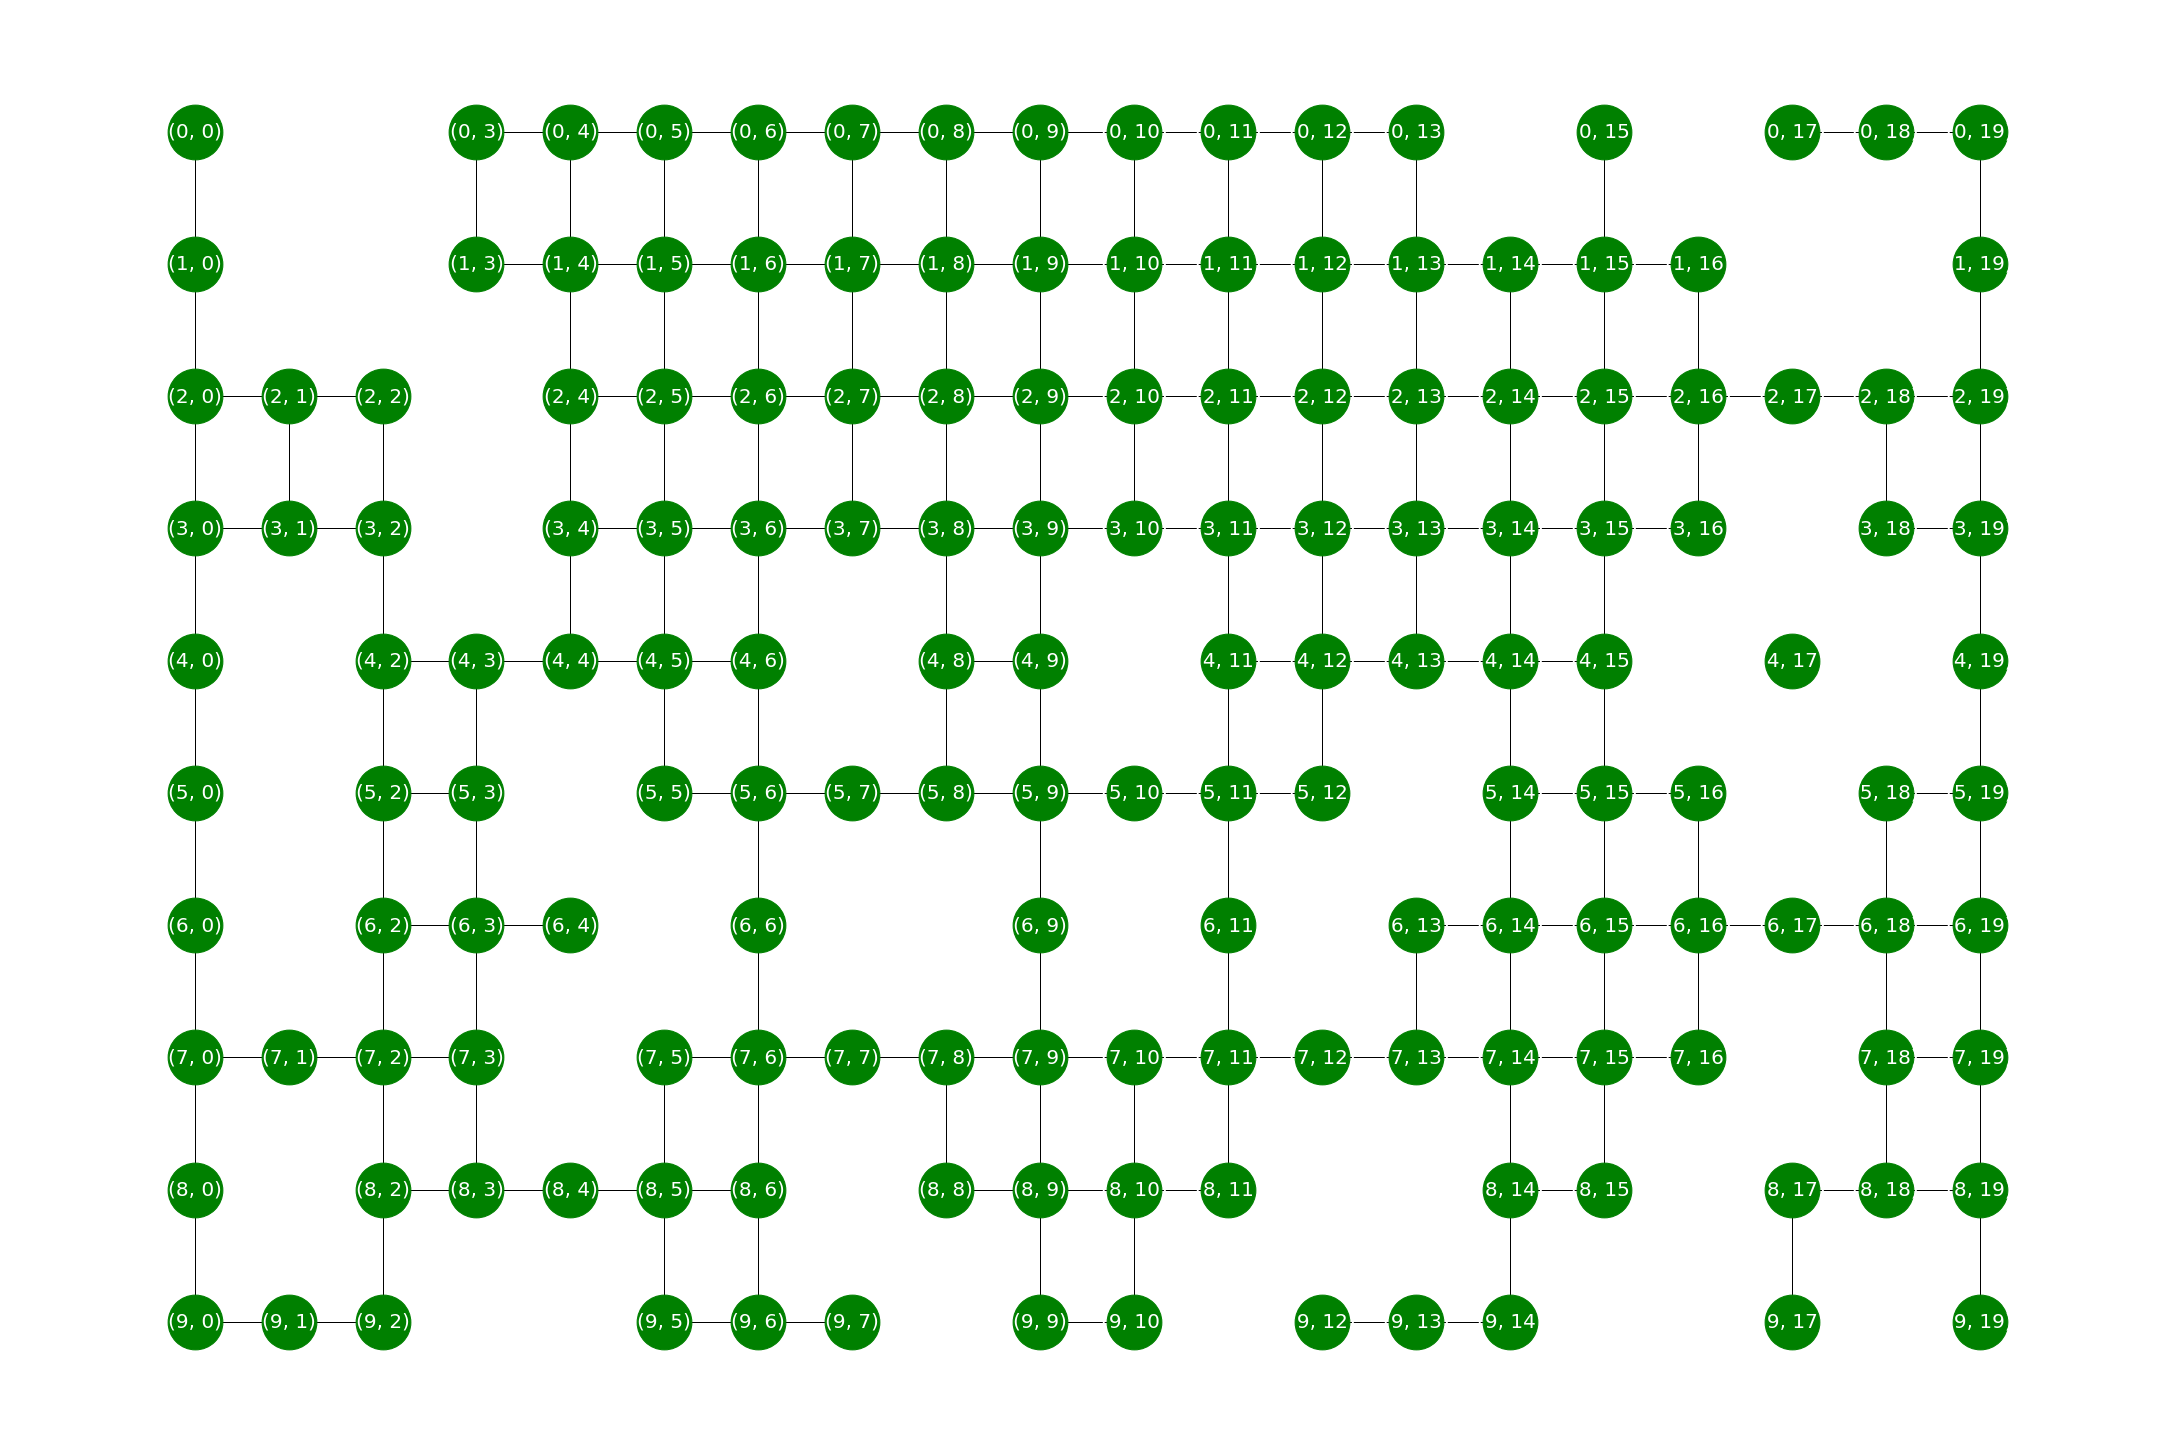

In [260]:
plt.figure(figsize=(30, 20))
points = {(x, y): (y, -x) for x, y in maze.nodes()}
nx.draw(maze, pos=points, node_color='green', with_labels=True, node_size=3000, font_size=20, font_color='white')

In [234]:
def plot_maze(path: list[tuple[int]] = []):
    image = []

    for x in range(grid_x):
        row = []
        for y in range(grid_y):
            if len(maze.edges((x, y))) != 0:
                row.append(1)
            else:
                row.append(0)

        image.append(row)
    
    if len(path) > 0:
        for x, y in path:
            image[x][y] = 0.5

        start = path[0]
        image[start[0]][start[1]] = 0.25
            
        end = path[-1]
        image[end[0]][end[1]] = 0.75
    
    image.reverse()
    plt.figure(figsize=(10, 5))
    plt.pcolormesh(image)
    plt.xticks([])
    plt.yticks([])
    plt.show()

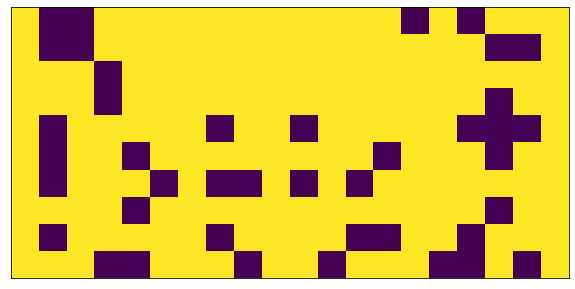

In [230]:
plot_maze()

In [221]:
def random_maze_start_end():
    while True:
        maze_start = (random.randint(0, grid_x - 1), random.randint(0, grid_y - 1))
        maze_end = (random.randint(0, grid_x - 1), random.randint(0, grid_y - 1))

        if maze.has_node(maze_start) and maze.has_node(maze_end):
            break

    return (maze_start, maze_end)

maze_start, maze_end = random_maze_start_end()
maze_start, maze_end

((6, 18), (9, 9))

In [222]:
path = nx.astar_path(maze, maze_start, maze_end)

path

[(6, 18),
 (6, 17),
 (6, 16),
 (7, 16),
 (7, 15),
 (7, 14),
 (7, 13),
 (7, 12),
 (7, 11),
 (8, 11),
 (8, 10),
 (9, 10),
 (9, 9)]

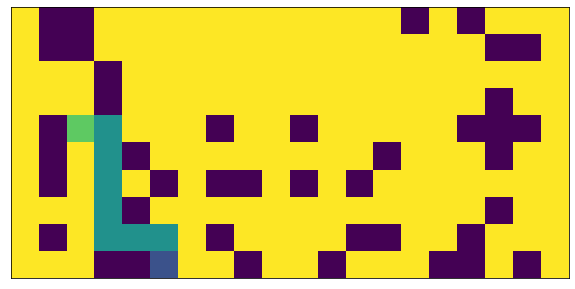

In [235]:
plot_maze(path)

In [255]:
maze_start, maze_end = random_maze_start_end()

maze_start, maze_end

((0, 0), (9, 19))

In [256]:
path = nx.astar_path(maze, maze_start, maze_end)

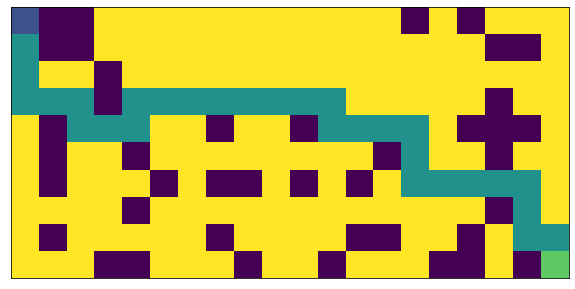

In [257]:
plot_maze(path)

In [237]:
maze_start, maze_end = random_maze_start_end()

maze_start, maze_end

((9, 9), (5, 0))

In [238]:
path = nx.astar_path(maze, maze_start, maze_end)

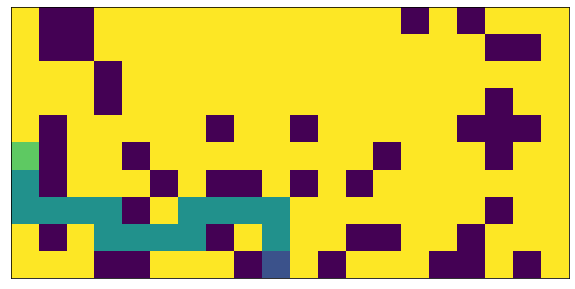

In [239]:
plot_maze(path)

In [240]:
maze_start, maze_end = random_maze_start_end()

maze_start, maze_end

((0, 10), (6, 4))

In [241]:
path = nx.astar_path(maze, maze_start, maze_end)

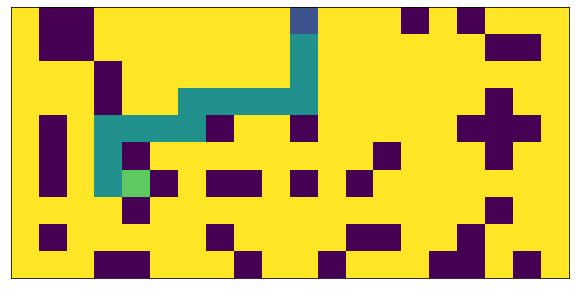

In [242]:
plot_maze(path)

In [243]:
maze_start, maze_end = random_maze_start_end()

maze_start, maze_end

((9, 7), (9, 12))

In [244]:
path = nx.astar_path(maze, maze_start, maze_end)

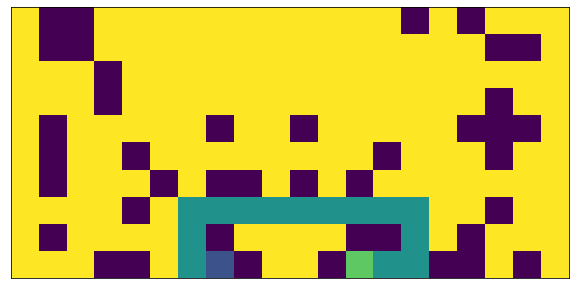

In [245]:
plot_maze(path)